Dicas para calcular:
- 20 produtos mais vendidos
- Dia da semana e horario do dia com mais vendas
- numero de produtos em cada departamento
- Taxa de Recompra pelo mesmo cliente

https://www.kaggle.com/code/vishwasparashar1706/market-basket-analysis

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# # Carregando o dataset
df = pd.read_csv('/content/ECommerce_consumer_behaviour.csv', encoding='latin-1')
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [3]:
# Verificando o tamanho do dataset
df.shape

(2019501, 12)

In [4]:
# verificando colunas duplicadas
df.duplicated().sum()

np.int64(0)

In [5]:
# Verificando se existe valores nulos
print(df.isnull().sum())

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64


In [7]:
# Verificando informações sobre o tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [8]:
# Verificando as estatísticas descritivas
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


<ipython-input-9-541ce3567ea5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['order_dow_nome'],


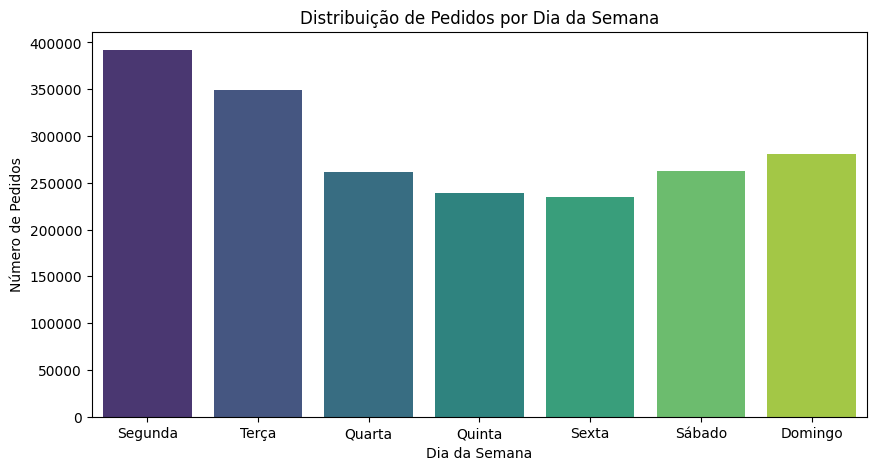

In [9]:
# Mapeando números para nomes dos dias da semana
dias_semana = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta',
               4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}

df['order_dow_nome'] = df['order_dow'].map(dias_semana)

# Contagem de pedidos por dia da semana
plt.figure(figsize=(10, 5))
sns.countplot(x=df['order_dow_nome'],
              order=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'],
              palette='viridis')
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Pedidos")
plt.title("Distribuição de Pedidos por Dia da Semana")
plt.show()

In [26]:
df['order_dow_nome'].value_counts()

,count
order_dow_nome,
Segunda,391831
Terça,349236
Domingo,280751
Sábado,262157
Quarta,261912
Quinta,238730
Sexta,234884


<ipython-input-10-c890766f463e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['order_hour_of_day'], palette='magma')


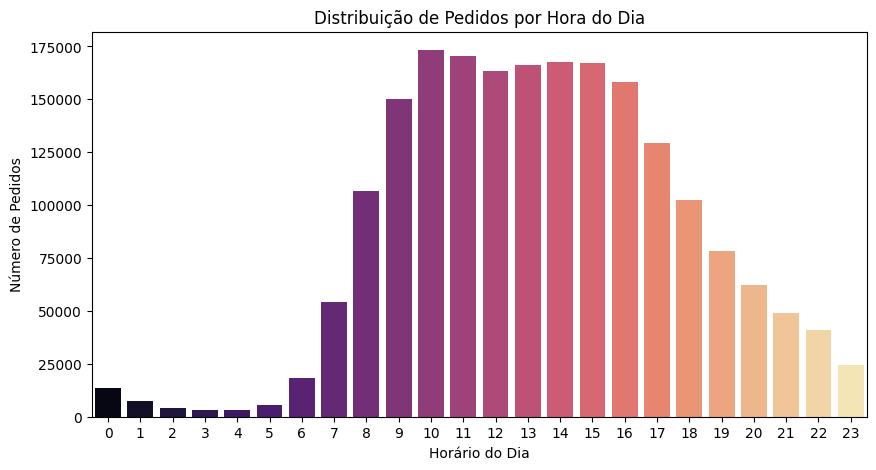

In [10]:
# Contagem de pedidos por hora do dia
# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.countplot(x=df['order_hour_of_day'], palette='magma')
plt.xlabel("Horário do Dia")
plt.ylabel("Número de Pedidos")
plt.title("Distribuição de Pedidos por Hora do Dia")
plt.show()

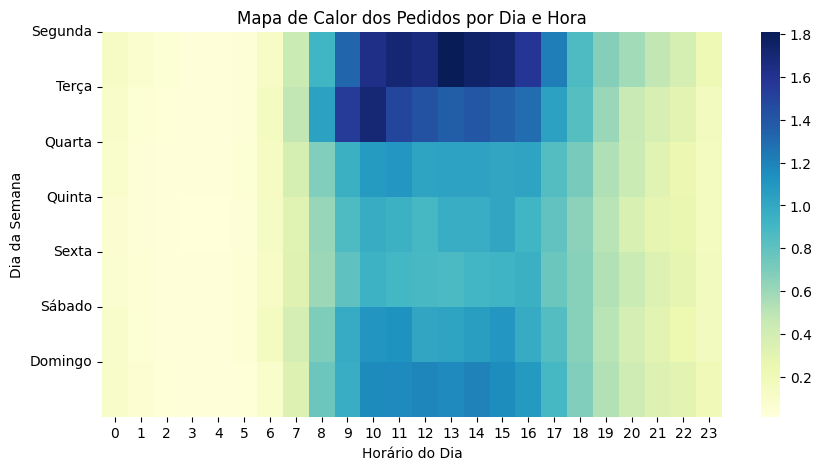

In [11]:
# Agrupando os dados por dia da semana e hora do pedido e contando os pedidos
dia_hora_df = df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()

# Criando uma tabela pivô para os dados
dia_hora_df_piv = dia_hora_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

# Normalizando os valores e transformando para porcentagem
dia_hora_df_piv_porcentage = (dia_hora_df_piv / df.shape[0]) * 100

# Criando o gráfico heatmap
plt.figure(figsize=(10,5))
sns.heatmap(dia_hora_df_piv_porcentage, cmap='YlGnBu', annot=False, fmt='.4f', cbar=True)
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'], rotation=0)
plt.xlabel("Horário do Dia")
plt.ylabel("Dia da Semana")
plt.title("Mapa de Calor dos Pedidos por Dia e Hora")
plt.show()

<ipython-input-12-ba83144de985>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produtos.values, y=top_produtos.index, palette="coolwarm")


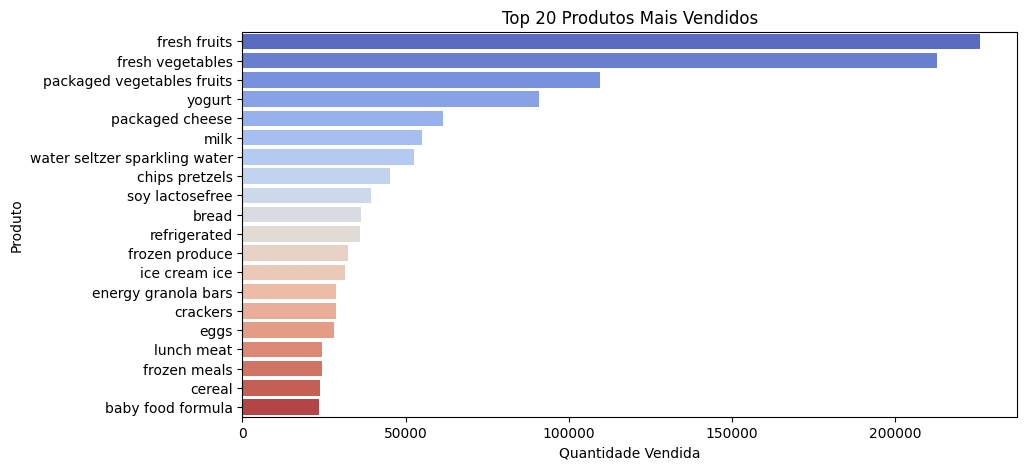

In [12]:
# Top 20 produtos mais vendidos
top_produtos = df['product_name'].value_counts().head(20)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 5))
sns.barplot(x=top_produtos.values, y=top_produtos.index, palette="coolwarm")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.title("Top 20 Produtos Mais Vendidos")
plt.show()

<ipython-input-13-587e02ced309>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['reordered'], palette="pastel")


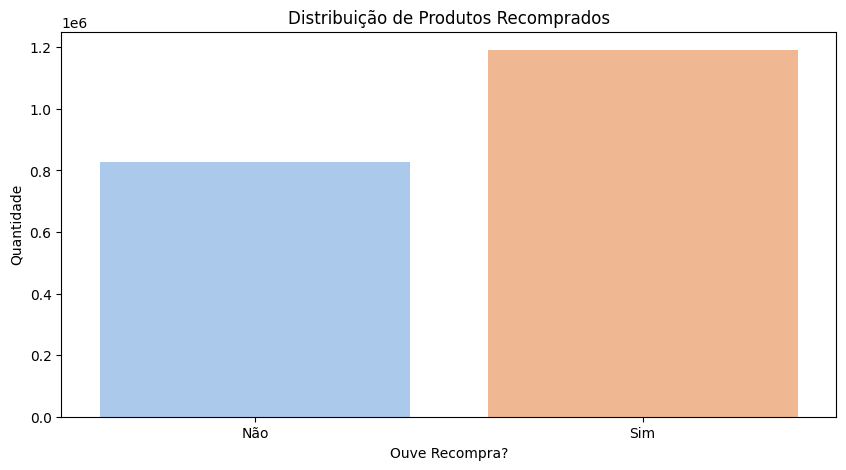

Taxa de Recompra: 58.97%


In [13]:
# Contagem de recompras
plt.figure(figsize=(10, 5))
sns.countplot(x=df['reordered'], palette="pastel")
plt.xlabel("Ouve Recompra?")
plt.ylabel("Quantidade")
plt.title("Distribuição de Produtos Recomprados")
plt.xticks([0, 1], ["Não", "Sim"])
plt.show()

# Porcentagem do total de recompras
reorder_rate = df['reordered'].mean() * 100
print(f"Taxa de Recompra: {reorder_rate:.2f}%")

<ipython-input-14-6ce750226335>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_recompra_produtos.values, y=top_recompra_produtos.index, palette="coolwarm")


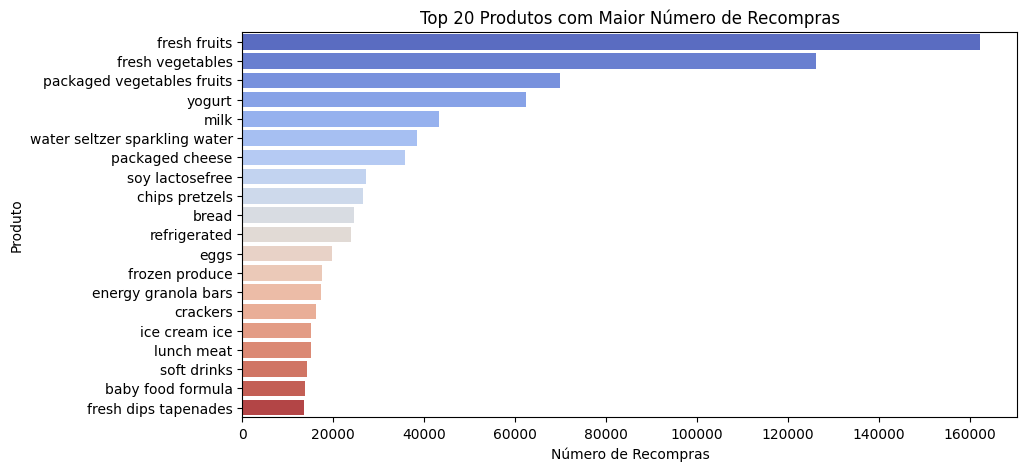

In [14]:
# Agrupando os produtos pelo número de recompras
recompra_produto_count = df.groupby('product_name')['reordered'].sum().sort_values(ascending=False)

# Selecionando os 20 produtos com maior número de recompras
top_recompra_produtos = recompra_produto_count.head(20)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 5))
sns.barplot(x=top_recompra_produtos.values, y=top_recompra_produtos.index, palette="coolwarm")
plt.xlabel("Número de Recompras")
plt.ylabel("Produto")
plt.title("Top 20 Produtos com Maior Número de Recompras")
plt.show()

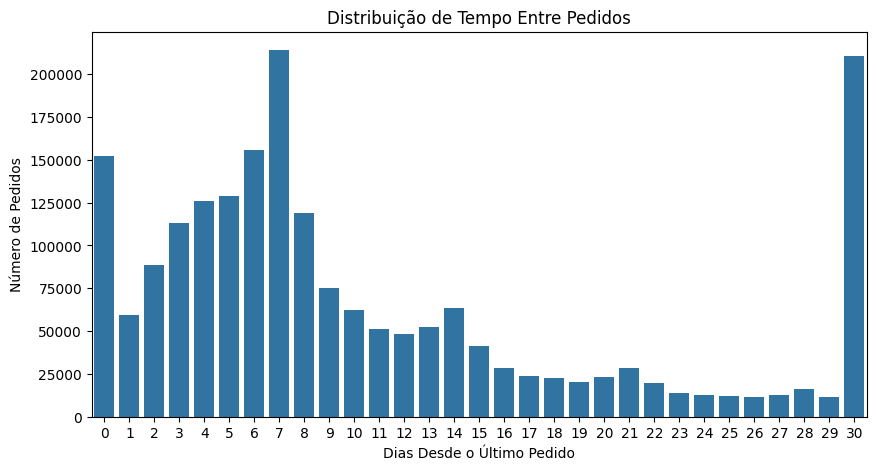

In [15]:
# Convertendo para inteiro
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0).astype(int)

# Contando a frequência de cada valor em 'days_since_prior_order'
order_gap_counts = df['days_since_prior_order'].value_counts().sort_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=order_gap_counts.index, y=order_gap_counts.values)
plt.xlabel("Dias Desde o Último Pedido")
plt.ylabel("Número de Pedidos")
plt.title("Distribuição de Tempo Entre Pedidos")
plt.xticks(rotation=0)
plt.show()

<ipython-input-18-5e8eacadd3a3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_usuarios_mais_frequentes.index,


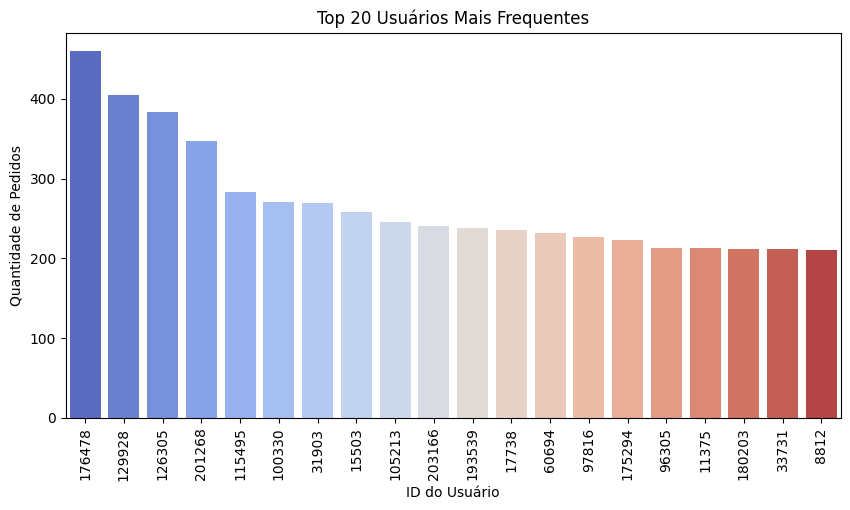

In [18]:
# Contando os pedidos por usuário e ordenando em ordem decrescente
usuarios_mais_frequentes = df['user_id'].value_counts().sort_values(ascending=False)

# Selecionando os 20 usuários mais frequentes
top_20_usuarios_mais_frequentes = usuarios_mais_frequentes.head(20)

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=top_20_usuarios_mais_frequentes.index,
            y=top_20_usuarios_mais_frequentes.values,
            order=top_20_usuarios_mais_frequentes.index,
            palette="coolwarm")
plt.title("Top 20 Usuários Mais Frequentes")
plt.xlabel('ID do Usuário')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=90)
plt.show()

<ipython-input-19-dec9f668c071>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantidade_por_departamento.index, y=quantidade_por_departamento.values, palette="coolwarm")


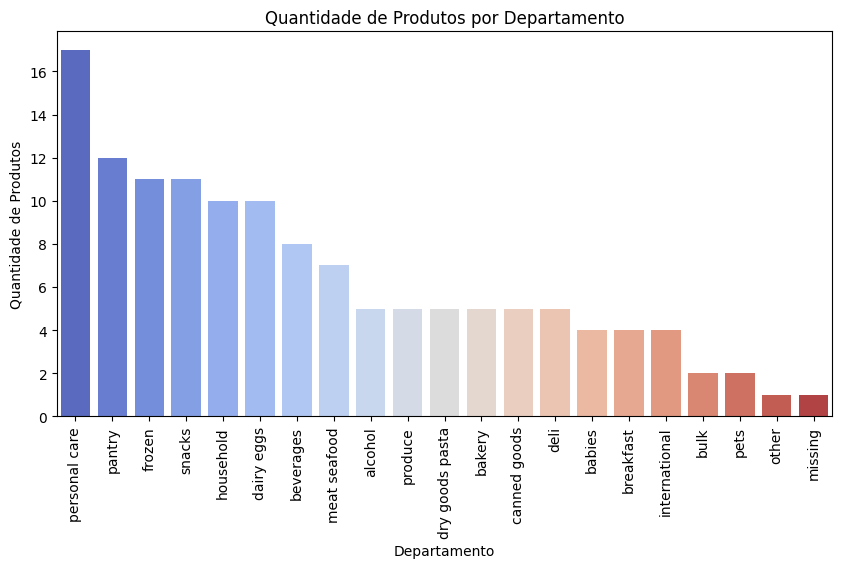

In [19]:
# Agrupando por departamento e contando a quantidade de produtos
quantidade_por_departamento = df.groupby('department')['product_name'].unique().apply(len).sort_values(ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=quantidade_por_departamento.index, y=quantidade_por_departamento.values, palette="coolwarm")
plt.xlabel('Departamento')
plt.ylabel('Quantidade de Produtos')
plt.title('Quantidade de Produtos por Departamento')
plt.xticks(rotation=90)
plt.show()

<ipython-input-20-d3913599f41a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantidade_por_departamento.index, y=quantidade_por_departamento.values, palette="coolwarm")


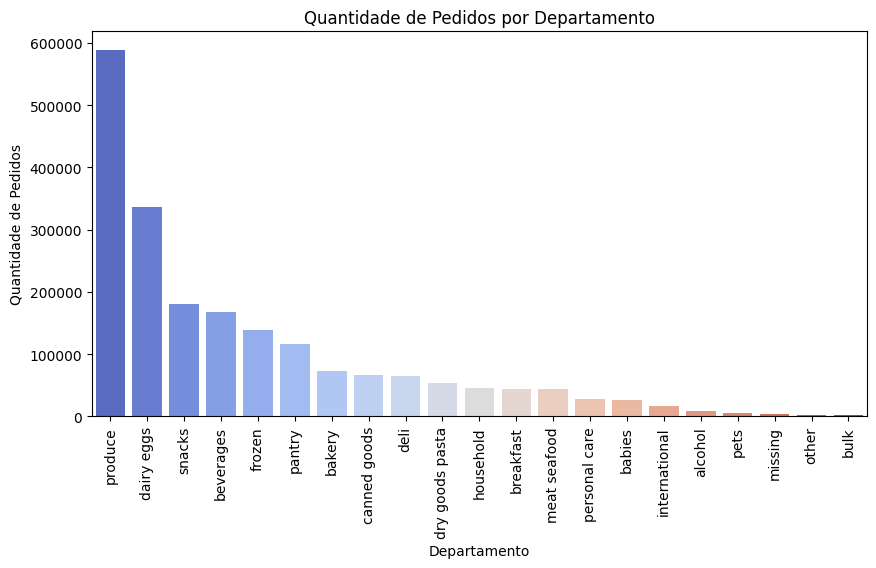

In [20]:
# Agrupando por departamento e contando a quantidade de produtos
quantidade_por_departamento = df.groupby('department')['product_name'].count().sort_values(ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=quantidade_por_departamento.index, y=quantidade_por_departamento.values, palette="coolwarm")
plt.xlabel('Departamento')
plt.ylabel('Quantidade de Pedidos')
plt.title('Quantidade de Pedidos por Departamento')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Criando a tabela de transações (cada pedido será uma linha, e cada produto terá um valor 1 ou 0)
basket = df.pivot_table(index='order_id', columns='product_name', values='add_to_cart_order', aggfunc='count').fillna(0)

# Convertendo para valores binários (1 = comprado, 0 = não comprado)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

basket.head()

<ipython-input-21-1cad4ade091c>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Aplicando o algoritmo Apriori para encontrar conjuntos de itens frequentes
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Gerando regras de associação a partir dos conjuntos de itens frequentes
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules.shape

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


(384, 14)

In [23]:
# Exibindo as regras mais relevantes
sorted_rules = rules.sort_values(by = 'lift', ascending = False)
regras_produto = sorted_rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.2)]
pd.set_option('display.max_rows', None)
regras_produto[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20)

<ipython-input-23-1108559ca3bb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  regras_produto = sorted_rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.2)]


,antecedents,consequents,support,confidence,lift
191,(fresh herbs),"(fresh fruits, fresh vegetables)",0.061815,0.664642,2.092964
187,"(fresh fruits, fresh herbs)",(fresh vegetables),0.061815,0.881372,1.983463
374,"(fresh fruits, packaged vegetables fruits)","(fresh vegetables, yogurt)",0.076240,0.282506,1.952899
379,"(fresh vegetables, yogurt)","(fresh fruits, packaged vegetables fruits)",0.076240,0.527029,1.952899
87,(fresh herbs),(fresh vegetables),0.078655,0.845707,1.903203
362,"(fresh fruits, fresh vegetables)","(packaged vegetables fruits, packaged cheese)",0.068325,0.215156,1.877290
363,"(packaged vegetables fruits, packaged cheese)","(fresh fruits, fresh vegetables)",0.068325,0.596152,1.877290
378,"(yogurt, packaged vegetables fruits)","(fresh fruits, fresh vegetables)",0.076240,0.596044,1.876950
375,"(fresh fruits, fresh vegetables)","(yogurt, packaged vegetables fruits)",0.076240,0.240081,1.876950
364,"(fresh vegetables, packaged vegetables fruits)","(fresh fruits, packaged cheese)",0.068325,0.291296,1.868482


### **Conclusão para a Regra de Associação Obtida**  

A regra de associação número 191 **(fresh herbs) → (fresh fruits, fresh vegetables)** indica que clientes que compram **ervas frescas** têm uma forte tendência a comprar também **frutas frescas e vegetais frescos**.  

 **Interpretação dos Indicadores:**  
- **Suporte = 6,18%** → A combinação de ervas frescas com frutas e vegetais aparece em **6,18% de todas as transações** do dataset. Isso sugere que essa associação ocorre com frequência relevante.  
- **Confiança = 66,46%** → Quando um cliente compra **ervas frescas**, há **66,46% de chance** de que ele também compre frutas e vegetais frescos. Esse valor indica uma relação forte entre esses produtos.  
- **Lift = 2,09** → Esse valor mostra que a compra de ervas frescas **aumenta em 2,09 vezes a probabilidade** de o cliente comprar frutas e vegetais, comparado a compras aleatórias. Como o lift é maior que 1, isso confirma que há uma **associação positiva e significativa** entre esses produtos.

In [25]:
# Produto que você quer analisar
produto_analise = 'milk'  # Substitua pelo nome do produto desejado

# Filtrando as regras de associação onde o produto está como antecedente
regras_produto_analise = rules[rules['antecedents'].apply(lambda x: produto_analise in list(x))]

# Exibindo as regras de associação mais relevantes
if not regras_produto.empty:
  display(regras_produto[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
  print(f"Não foram encontradas regras de associação para o produto '{produto_analise}'.")

,antecedents,consequents,support,confidence,lift
5,(milk),(bread),0.059705,0.245371,1.497400
65,(milk),(fresh fruits),0.164310,0.675270,1.214525
97,(milk),(fresh vegetables),0.124715,0.512545,1.153445
117,(milk),(packaged cheese),0.078170,0.321258,1.390756
119,(milk),(packaged vegetables fruits),0.107425,0.441488,1.208182
121,(milk),(yogurt),0.095705,0.393322,1.491691
199,"(fresh fruits, milk)",(fresh vegetables),0.099590,0.606110,1.364008
200,"(fresh vegetables, milk)",(fresh fruits),0.099590,0.798541,1.436237
203,(milk),"(fresh fruits, fresh vegetables)",0.099590,0.409288,1.288852
247,"(fresh fruits, milk)",(packaged cheese),0.059885,0.364464,1.577798
